In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',600)

In [180]:
test=pd.read_csv('Test_.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [181]:
test['type']='test'

In [182]:
train=pd.read_csv('Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [183]:
train['type']='train'

In [184]:
train.shape

(8523, 13)

In [185]:
test.shape

(5681, 12)

In [186]:
#concating the tran and test to do eda.

df=[test,train]

In [187]:
data=pd.concat(df,ignore_index=False)
data.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type
0,Low Fat,FDW58,107.8622,NaN,Snack Foods,0.007565,20.750,1999,OUT049,Tier 1,Medium,Supermarket Type1,test
1,reg,FDW14,87.3198,NaN,Dairy,0.038428,8.300,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
2,Low Fat,NCN55,241.7538,NaN,Others,0.099575,14.600,1998,OUT010,Tier 3,NaN,Grocery Store,test
3,Low Fat,FDQ58,155.0340,NaN,Snack Foods,0.015388,7.315,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
4,Regular,FDY38,234.2300,NaN,Dairy,0.118599,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,test


In [188]:
data.shape

(14204, 13)

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 8522
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
type                         14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [190]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'type'],
      dtype='object')

In [191]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
type                            0
dtype: int64

In [192]:
data.Item_Weight.unique()

array([20.75 ,  8.3  , 14.6  ,  7.315,    nan,  9.8  , 19.35 ,  6.305,
        5.985, 16.6  ,  6.59 ,  4.785, 16.75 ,  6.135, 19.85 , 17.85 ,
       13.6  ,  7.1  , 19.2  , 13.65 ,  6.785, 13.   ,  5.825, 13.8  ,
       12.8  ,  9.5  , 12.5  ,  5.78 , 10.395, 18.35 , 21.1  , 19.75 ,
        8.43 , 15.35 ,  6.71 , 10.195, 11.65 , 12.85 , 12.15 , 18.25 ,
        5.98 , 12.65 , 13.1  , 20.7  ,  7.855, 13.35 , 17.25 ,  8.315,
       21.35 ,  5.88 ,  7.435, 14.65 , 14.   , 18.2  , 17.6  ,  7.71 ,
        7.81 , 16.35 , 16.1  ,  5.34 ,  5.51 ,  6.61 ,  6.38 ,  8.71 ,
       17.75 ,  6.44 , 12.6  ,  7.935, 18.5  ,  6.035, 11.8  ,  6.26 ,
       16.5  , 15.7  ,  6.635,  8.155,  6.175,  8.18 ,  8.355,  6.905,
       20.35 , 19.25 ,  5.48 ,  5.425, 12.1  , 11.   ,  5.765,  5.44 ,
        6.13 ,  8.195, 14.15 , 14.3  ,  5.635,  5.73 ,  7.155, 15.2  ,
       15.25 ,  8.76 ,  9.13 , 19.6  , 10.   , 11.3  ,  6.57 , 13.15 ,
        4.635, 10.6  ,  9.3  ,  7.02 ,  7.825, 19.1  ,  7.51 ,  8.85 ,
      

In [193]:
data.Outlet_Size.unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [196]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
type                          object
dtype: object

In [197]:
#replacing the null values
data['Item_Weight']=data['Item_Weight'].fillna((data['Item_Weight'].median()))

In [198]:
data['Outlet_Size']=data['Outlet_Size'].fillna((data['Outlet_Size'].mode()[0]))

In [199]:
data.Item_Type.unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [200]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
type                            0
dtype: int64

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


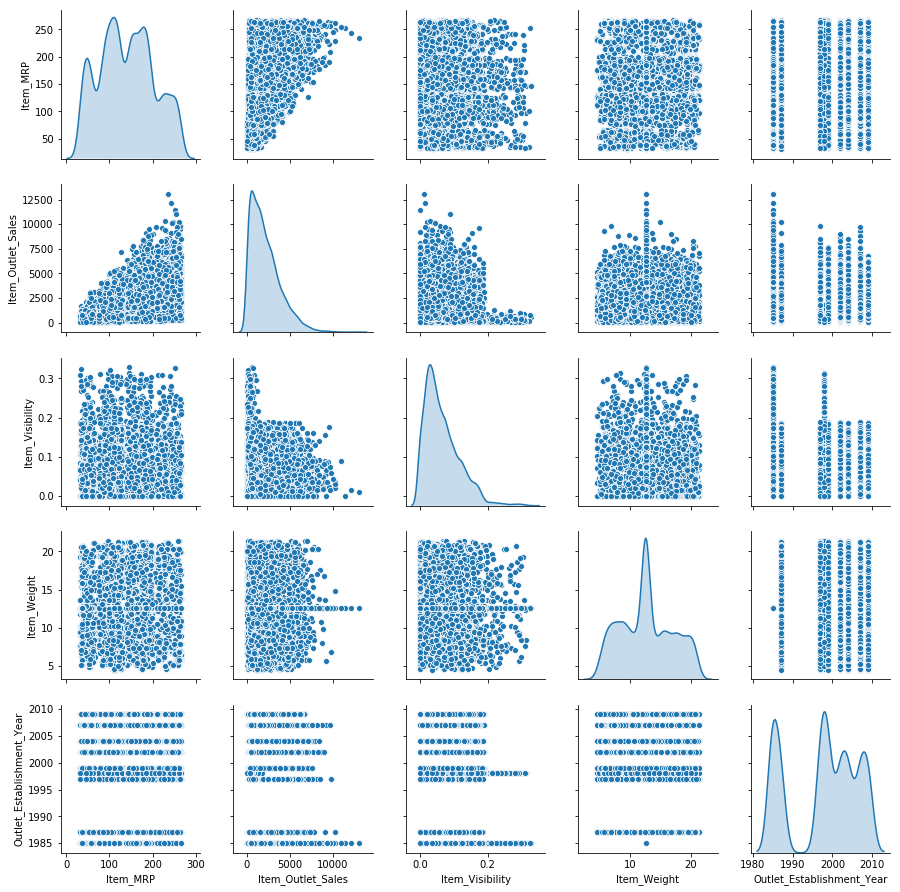

In [201]:
#visualization


sns.pairplot(data,diag_kind='kde')

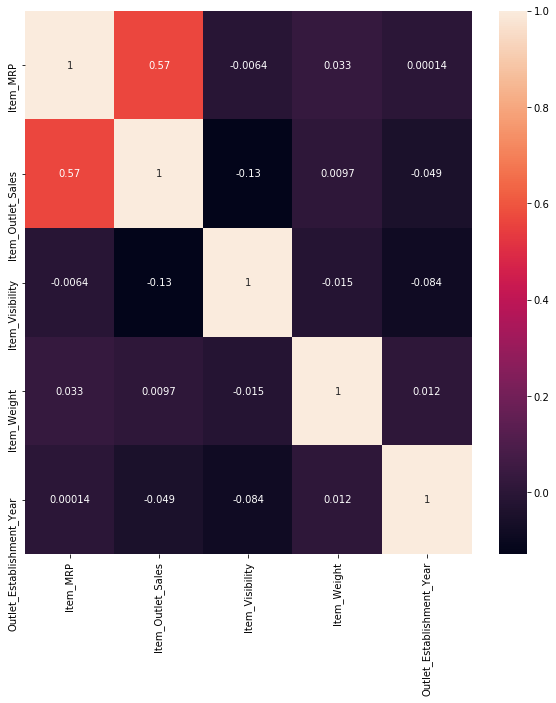

In [202]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [203]:
data.Item_Type.unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [204]:
data.head(50)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type
0,Low Fat,FDW58,107.8622,NaN,Snack Foods,0.007565,20.750,1999,OUT049,Tier 1,Medium,Supermarket Type1,test
1,reg,FDW14,87.3198,NaN,Dairy,0.038428,8.300,2007,OUT017,Tier 2,Medium,Supermarket Type1,test
2,Low Fat,NCN55,241.7538,NaN,Others,0.099575,14.600,1998,OUT010,Tier 3,Medium,Grocery Store,test
3,Low Fat,FDQ58,155.0340,NaN,Snack Foods,0.015388,7.315,2007,OUT017,Tier 2,Medium,Supermarket Type1,test
4,Regular,FDY38,234.2300,NaN,Dairy,0.118599,12.600,1985,OUT027,Tier 3,Medium,Supermarket Type3,test
5,Regular,FDH56,117.1492,NaN,Fruits and Vegetables,0.063817,9.800,1997,OUT046,Tier 1,Small,Supermarket Type1,test
6,Regular,FDL48,50.1034,NaN,Baking Goods,0.082602,19.350,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
7,Low Fat,FDC48,81.0592,NaN,Baking Goods,0.015782,12.600,1985,OUT027,Tier 3,Medium,Supermarket Type3,test
8,Regular,FDN33,95.7436,NaN,Snack Foods,0.123365,6.305,2002,OUT045,Tier 2,Medium,Supermarket Type1,test
9,Low Fat,FDA36,186.8924,NaN,Baking Goods,0.005698,5.985,2007,OUT017,Tier 2,Medium,Supermarket Type1,test


In [205]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [206]:
data.Item_Fat_Content=data.Item_Fat_Content.replace('LF','Low Fat')

In [207]:
data.Item_Fat_Content=data.Item_Fat_Content.replace('low fat','Low Fat')

In [208]:
data.Item_Fat_Content=data.Item_Fat_Content.replace('reg','Regular')

In [209]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [210]:
data1=data.copy()

In [211]:
data1.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
type                          object
dtype: object

In [212]:
data1.Item_Identifier.unique()

array(['FDW58', 'FDW14', 'NCN55', ..., 'FDL10', 'FDX04', 'FDU19'],
      dtype=object)

In [213]:
# splitting the column item indentifier


li=[]
for j in data1.Item_Identifier:
    if(j[0:2]=='FD'):
        li.append('food')
    elif (j[0:2]=='DR'):
        li.append('Drinks')
    else:
        li.append('house')
data1['Product_Type']=li

In [214]:
data1.Product_Type.unique()

array(['food', 'house', 'Drinks'], dtype=object)

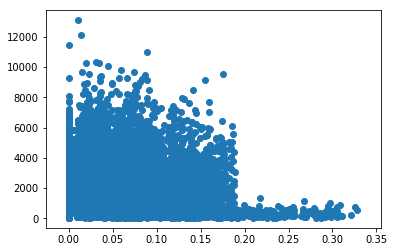

In [215]:
plt.scatter(x='Item_Visibility',y='Item_Outlet_Sales', data = data1)

In [216]:
data1.Item_Visibility.unique()

array([0.00756484, 0.03842768, 0.09957491, ..., 0.03518627, 0.14522065,
       0.04487828])

In [217]:
data1.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
type                          object
Product_Type                  object
dtype: object

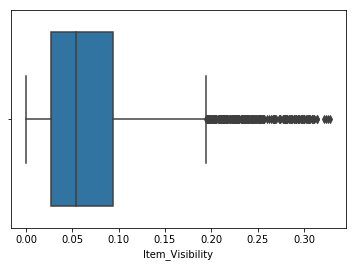

In [218]:
sns.boxplot(data1['Item_Visibility'])

In [219]:
q1=data1['Item_Visibility'].quantile(0.25)
q3=data1['Item_Visibility'].quantile(0.75)
iqr=q3-q1
print(iqr)

0.067001571


In [220]:
upperlimit=q3+1.5*iqr
print(upperlimit)

0.19453961


In [221]:
lowerlimit=q1-1.5*iqr
print(lowerlimit)

-0.073466674


In [222]:
outliers=data1[(data1['Item_Visibility']>upperlimit)|(data1['Item_Visibility']<lowerlimit)]
outliers.shape[0]

261

In [223]:
# we are imputing the outliers with the upper limit to remove the outliers
data1['Item_Visibility']=np.where(data1['Item_Visibility']>upperlimit,upperlimit,data1['Item_Visibility'])

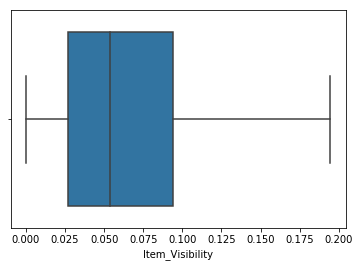

In [224]:
sns.boxplot(data1['Item_Visibility'])

In [225]:
#replacing the zero values in the column with its mean
data1['Item_Visibility']=data1['Item_Visibility'].replace(0,data1.Item_Visibility.mean())

In [226]:
data1.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
type                          object
Product_Type                  object
dtype: object

In [3]:
data2 = data1.copy()

NameError: name 'data1' is not defined

In [260]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data2['Outlet']=le.fit_transform(data2['Outlet_Identifier'])


In [261]:
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet','Item_Outlet_Sales']
le=LabelEncoder()
for i in var_mod:
    data2[i]=le.fit_transform(data2[i])

In [2]:
# dividing into train and test

train=data2.loc[data1['type']=='train']
test=data2.loc[data1['type']=='test']



NameError: name 'data2' is not defined

In [1]:
train.shape

NameError: name 'train' is not defined

In [263]:
# dropping unnesessary coulms:

test1=test.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','type'],axis=1)
train1=train.drop(['type','Item_Identifier','Outlet_Identifier'],axis=1)

In [282]:
X=train1.drop('Item_Outlet_Sales',axis=1)
print(X.shape)

(8523, 11)


In [283]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Fat_Content             8523 non-null int64
Item_MRP                     8523 non-null float64
Item_Type                    8523 non-null object
Item_Visibility              8523 non-null float64
Item_Weight                  8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Location_Type         8523 non-null int64
Outlet_Size                  8523 non-null int64
Outlet_Type                  8523 non-null int64
Product_Type                 8523 non-null object
Outlet                       8523 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 799.0+ KB


In [284]:
Y=train['Item_Outlet_Sales']
print(Y.shape)

(8523,)


In [285]:
XX=pd.get_dummies(X)

In [286]:
test2 = pd.get_dummies(test1)

In [287]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,Y,test_size = 0.4 , random_state = 7)

In [288]:
from sklearn import linear_model

In [289]:
model = linear_model.LinearRegression()

In [290]:
model.fit (X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [291]:
model.score(X_train,y_train)

0.5587208624075812

In [292]:
print(XX.shape)
print(test2.shape)

(8523, 28)
(5681, 28)


In [293]:
pred=model.predict(test2)

In [294]:
pred

array([1600.20899293,  947.88620587, 1396.21632763, ..., 1410.66504015,
       2105.77299493, 1092.70802861])

In [296]:
fin=pd.DataFrame()
fin['Item_Identifier'] = test['Item_Identifier']
fin['Outlet_Identifier']=test['Outlet_Identifier']
fin['Item_Outlet_Sales']=pd.DataFrame(pred)

In [297]:
fin.tail()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
5676,FDB58,OUT046,1588.188035
5677,FDD47,OUT018,2073.691015
5678,NCO17,OUT045,1410.665040
5679,FDJ26,OUT017,2105.772995
5680,FDU37,OUT045,1092.708029


In [298]:
fin.to_csv('walmart1.csv',index=None,header=True)